<a href="https://colab.research.google.com/github/ChastityB/Food_Sales_Predictions/blob/main/Food_Sales_Predictions_Week4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
filename = "/content/drive/MyDrive/Coding Dojo/03 Week 3: Exploratory Viz/Assignments Exercise/sales_predictions.csv"
df_sales = pd.read_csv(filename)
df_sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
#display number of rows and columns
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
#Let's get the number of rows and columns specifically
df_sales.shape
#8523 rows and 12 columns

(8523, 12)

In [8]:
#Let's check what are the datatypes of each variable
df_sales.dtypes
#object = strings or mixed numberic+string value
#float64 = floating numbers

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [9]:
#Let's check for duplicates
display(df_sales[df_sales.duplicated(keep=False)])
df_sales.duplicated().any()

#We have no duplicate values

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


False

In [10]:
#Let's find missing values
df_sales.isna().sum()
#looks like Item_Weight and Outlet_Size have 1463 and 2410 missing values respectively

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [11]:
#Outlet_Size doesn't seem relevant to our data, so lets drop it
df_sales.drop(columns=['Outlet_Size'], inplace=True)
df_sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,Tier 3,Supermarket Type1,994.7052


In [12]:
#Checking where the NA values are located in Item_Weight
df_sales[df_sales.isnull().any(axis=1)]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Tier 3,Supermarket Type3,2756.4120
8490,FDU44,NaN,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Tier 1,Grocery Store,487.3656


In [13]:
#Let's replace the NAs in Item_Weight with the mean since the data looks symmetric
df_sales.fillna(value=df_sales['Item_Weight'].mean(), inplace=True)

In [14]:
#confirming all missing values are gone
df_sales.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [15]:
#confirming all missing values are gone
df_sales.info()
#Looks like we are good!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 732.6+ KB


In [16]:
#Let's find and see if we have inconsistent data
df_sales.value_counts()
#It looks like Item_Fat_Content might have inconsistent values. Let's check in detail

Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type              Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  Outlet_Location_Type  Outlet_Type        Item_Outlet_Sales
DRA12            11.600000    LF                0.000000         Soft Drinks            141.9154  OUT035             2004                       Tier 2                Supermarket Type1  992.7078             1
FDV28            12.857645    Regular           0.158955         Frozen Foods           34.9558   OUT027             1985                       Tier 3                Supermarket Type3  1120.5414            1
FDV32            7.785000     Low Fat           0.089210         Fruits and Vegetables  64.2510   OUT017             2007                       Tier 2                Supermarket Type1  1328.2710            1
                                                0.089070         Fruits and Vegetables  62.7510   OUT018             2009                       Tier 3                Superma

In [17]:
df_sales['Item_Fat_Content'].value_counts()
#Yes, there seems to be a couple names abbreviated

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [18]:
#Let's replace the abbreviated names to full names
df_sales.replace({'LF': 'Low Fat', 'reg': 'Regular', 'low fat':'Low Fat'}, inplace=True)

In [19]:
#Now lets check again if all of Item_Fat_Content got replaced
df_sales['Item_Fat_Content'].value_counts()
#We are good to go!

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [20]:
#Making sure all the other suspected columns have no irregularities
display(df_sales['Item_Type'].value_counts())
display(df_sales['Outlet_Type'].value_counts())
df_sales['Outlet_Location_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [21]:
#Now lets get the summary statistics of each mumerical column
df_sales.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


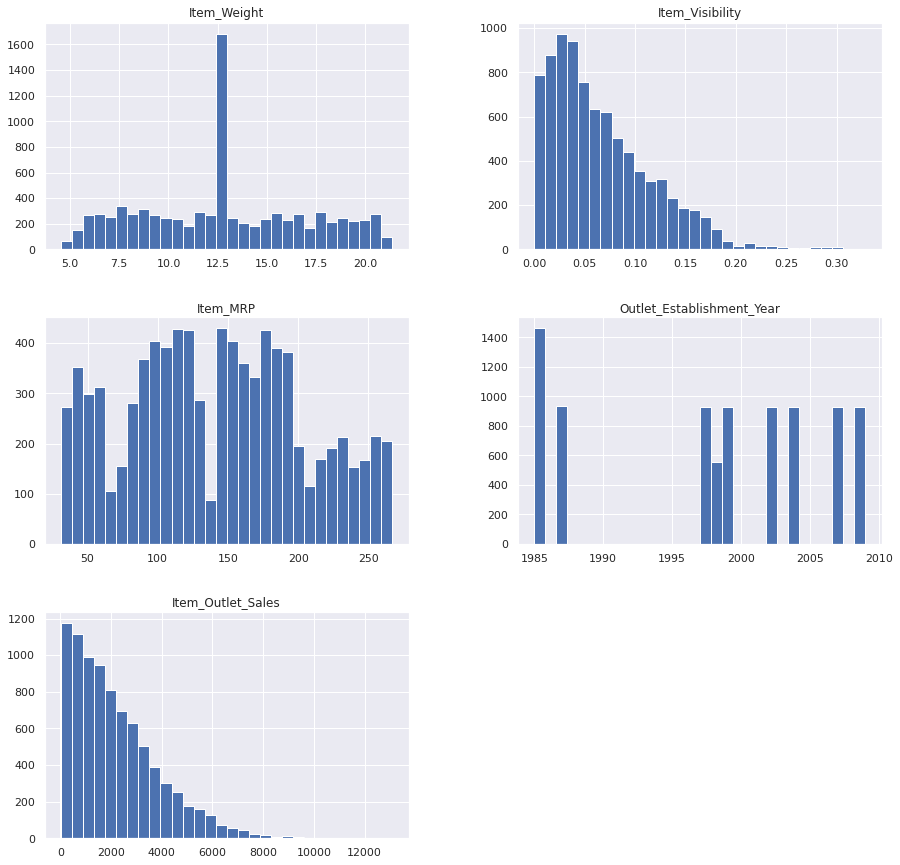

In [147]:
df_sales.hist(bins = 30, figsize = (15,15));

The data shows that fruits and vegetables and snack foods are leading in sales.
Customers seem to buy those two categories the most.


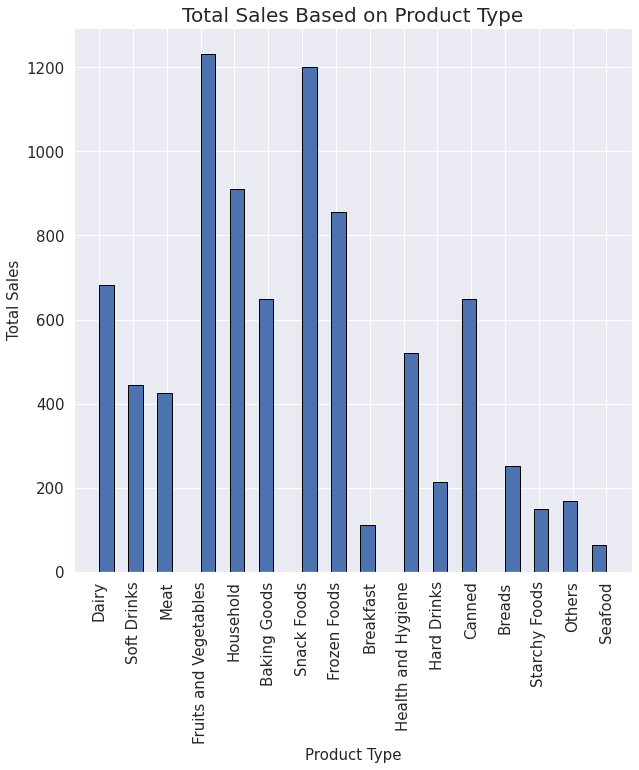

In [150]:
#How often are customers buying these products?
df_sales['Item_Type'].hist(edgecolor = "black", bins = 35, figsize = (10,10))
plt.xticks(rotation = 90, fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Product Type', fontsize = 15)
plt.ylabel('Total Sales', fontsize = 15)
plt.title('Total Sales Based on Product Type', fontsize=20);

print('The data shows that fruits and vegetables and snack foods are leading in sales.')
print('Customers seem to buy those two categories the most.')

Customers seem to shop more at Supermarket Type 1
More clarity is needed to determine what each type means.


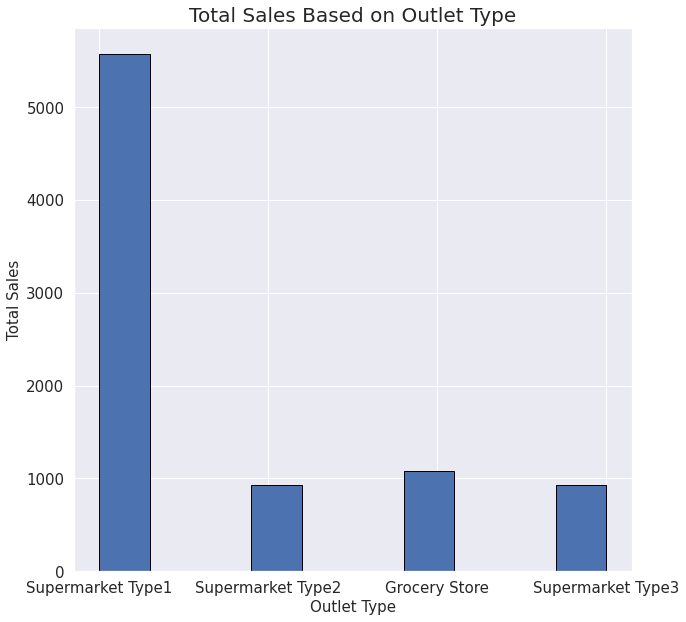

In [149]:
#What outlets do customers prefer?
df_sales['Outlet_Type'].hist(edgecolor='black', figsize=(10,10))
plt.xlabel('Outlet Type', fontsize=15)
plt.ylabel('Total Sales', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Total Sales Based on Outlet Type', fontsize=20);
print('Customers seem to shop more at Supermarket Type 1')
print('More clarity is needed to determine what each type means.')

The means are fairly close to each other except for baking goods, frozen items, health and hygiene seem lower.
The means of breakfast, starchy foods, and seafood are higher


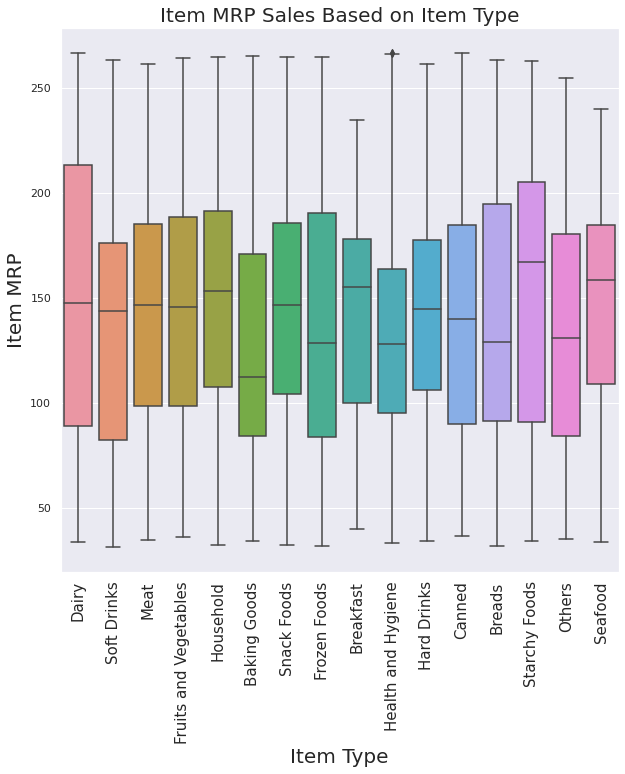

In [148]:
#Does price have an impact on sales?
sns.boxplot(x='Item_Type', y='Item_MRP', data=df_sales)
sns.set(rc = {'figure.figsize':(5,5)})
plt.xticks(rotation=90, fontsize=15)
plt.xlabel("Item Type", fontsize=20)
plt.ylabel("Item MRP" ,fontsize=20)
plt.title('Item MRP Sales Based on Item Type', fontsize=20);

print('The means are fairly close to each other except for baking goods, frozen items, health and hygiene seem lower.')
print('The means of breakfast, starchy foods, and seafood are higher')

There are plenty of outliers in this data set from all outlet types
The means of supermaket type1 and type2 are fairly close to being the same.
The means of Grocery store is lower, but then again, this could be due to small data amount.
The means of supermarket type3 is much higher than the other data types.


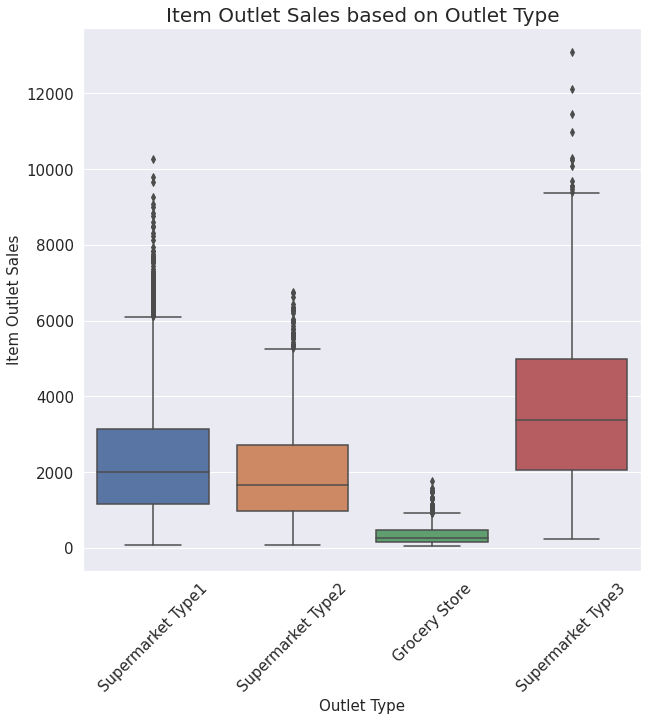

In [124]:
#Does the outlet sales differ by supermarket type?
sns.boxplot(x="Outlet_Type", y="Item_Outlet_Sales", data=df_sales)
plt.xticks(rotation=45, fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Outlet Type', fontsize=15)
plt.ylabel("Item Outlet Sales", fontsize=15)
plt.title('Item Outlet Sales based on Outlet Type', fontsize=20)
print('There are plenty of outliers in this data set from all outlet types')
print('The means of supermaket type1 and type2 are fairly close to being the same.') 
print('The means of Grocery store is lower, but then again, this could be due to small data amount.')
print('The means of supermarket type3 is much higher than the other data types.');


There is only a medium positive correlation between item_MRP and Item_Outlet_sales


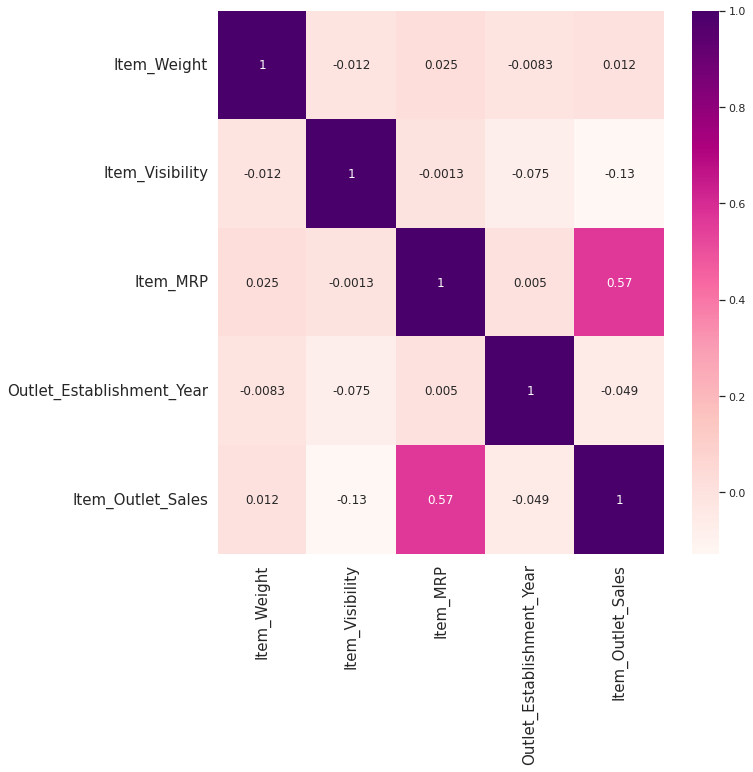

In [129]:
#Check for any correlation
corr = df_sales.corr()
sns.heatmap(corr, cmap = "RdPu", annot=True)
sns.set(rc = {'figure.figsize':(10,10)})
plt.xticks(fontsize=15)
plt.yticks(fontsize=15);
print('There is only a medium positive correlation between item_MRP and Item_Outlet_sales')

In this scatterplot, you can see the positive correlation between Item MRP and Item Outlet Sales


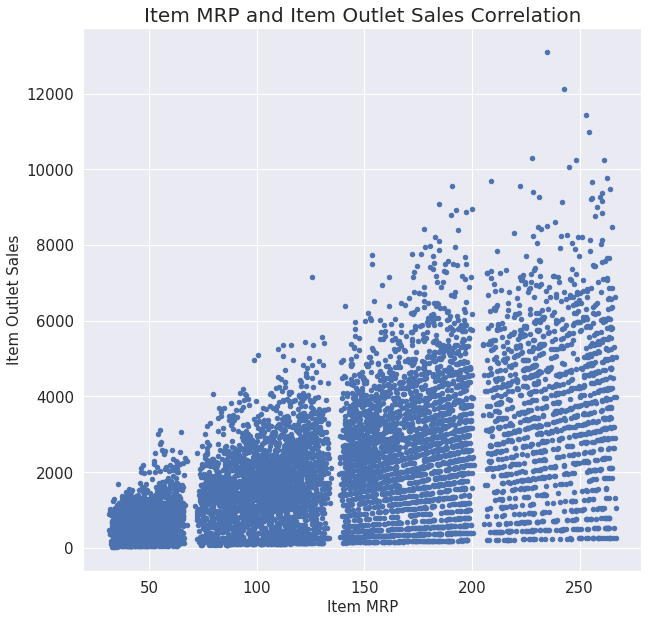

In [128]:
df_sales.plot.scatter(x='Item_MRP', y='Item_Outlet_Sales', figsize=(10,10), color='b')
plt.title('Item MRP and Item Outlet Sales Correlation', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Item MRP',fontsize=15)
plt.ylabel('Item Outlet Sales', fontsize=15);
print('In this scatterplot, you can see the positive correlation between Item MRP and Item Outlet Sales')